In [1]:
import pandas as pd
import matplotlib.pyplot as plt

link = './../data/NSW/nsw_df.parquet'
df = pd.read_parquet(link)
df = df[['TOTALDEMAND']]
print(df.head(1))
print(df.shape)
print(df.index.min())
print(df.index.max())
print(df.index.dtype)

                     TOTALDEMAND
2010-01-02 00:30:00       7343.3
(196464, 1)
2010-01-02 00:30:00
2021-03-18 00:00:00
datetime64[ns]


In [3]:
#pd.plotting.lag_plot(df, lag=1)
df_lag1 = df.shift(1)
df_lag2 = df.shift(2) 

In [69]:
def lag_plot(df, var_name, lag):
    df = df[var_name]
    df_lag = df.shift(lag)
    
    #Plotting
    plt.scatter(df, df_lag)
    plt.xlabel(f'{var_name}_(i)')
    plt.ylabel(f'{var_name}_(i+{str(lag)})')
    plt.title(f'Lag {lag} Plot')
    plt.grid(True) #Grid
    plt.axline((0, 0), slope=1, color='red') #y=x line
    plt.xlim(min(df.min(), df_lag.min()), max(df.max(), df_lag.max()))
    plt.ylim(min(df.min(), df_lag.min()), max(df.max(), df_lag.max()))
    plt.text(df.min()+0.1*df.min(), df.max()-0.1*df.max(), f'ρ={df.corr(df_lag):.2f}', va='top', ha='left', fontsize=20, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
    plt.show()
    return None

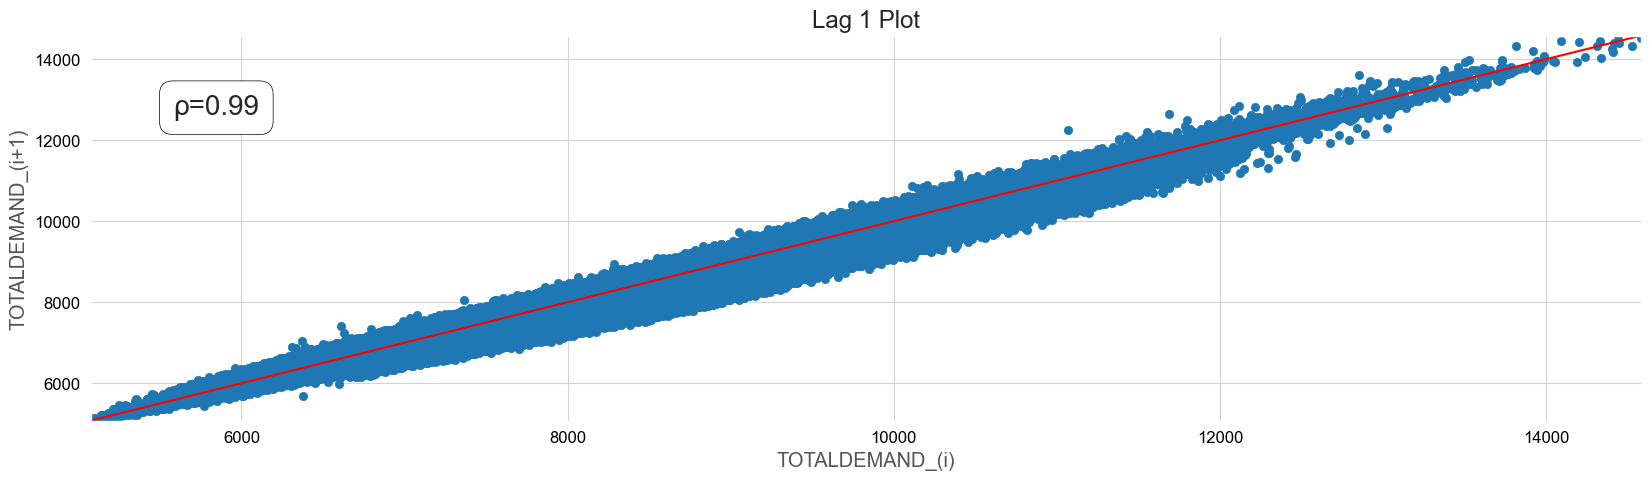

In [70]:
lag_plot(df, 'TOTALDEMAND', 1)

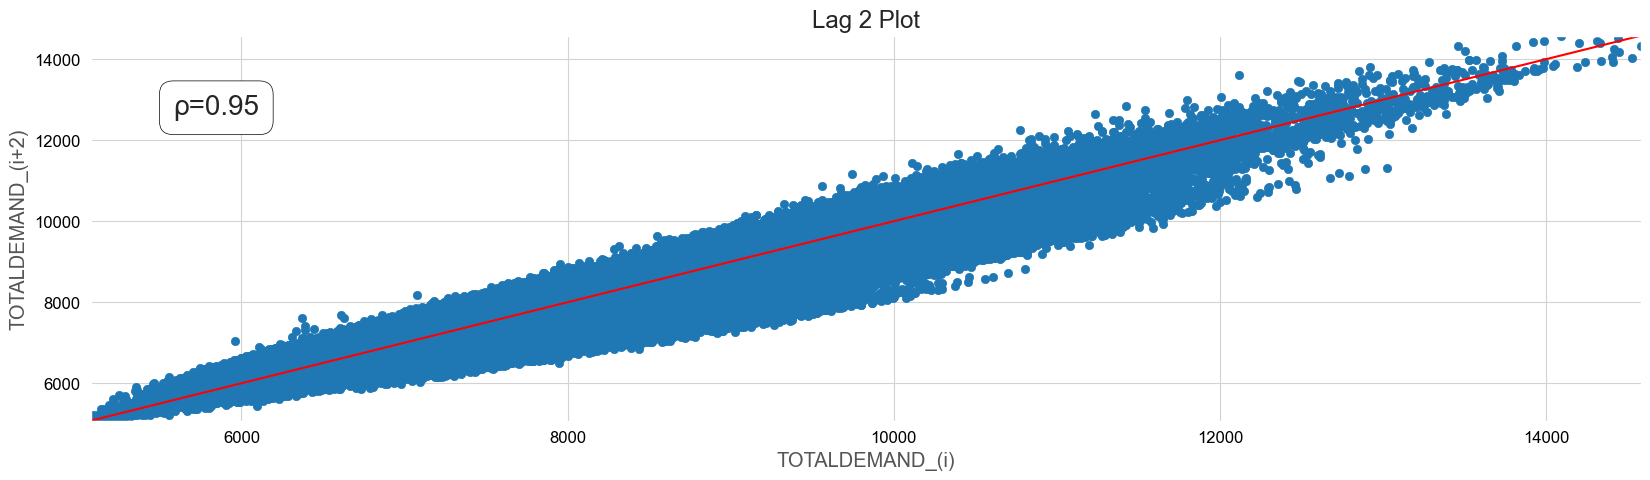

In [71]:
lag_plot(df, 'TOTALDEMAND', 2)

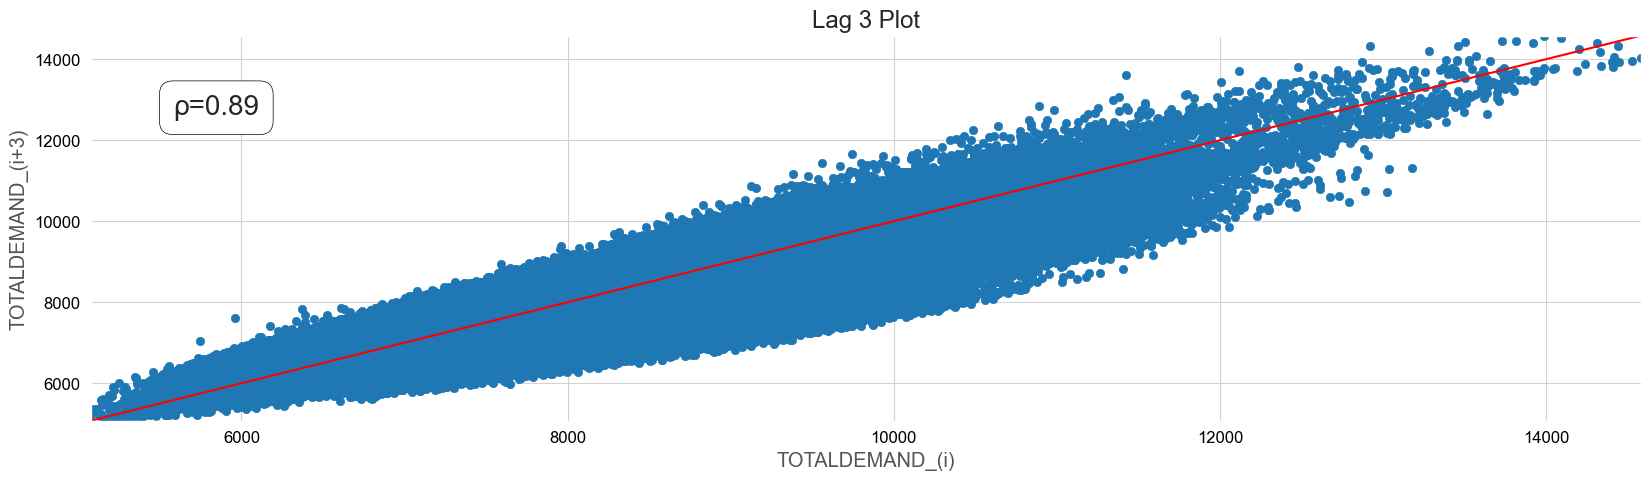

In [72]:
lag_plot(df, 'TOTALDEMAND', 3)

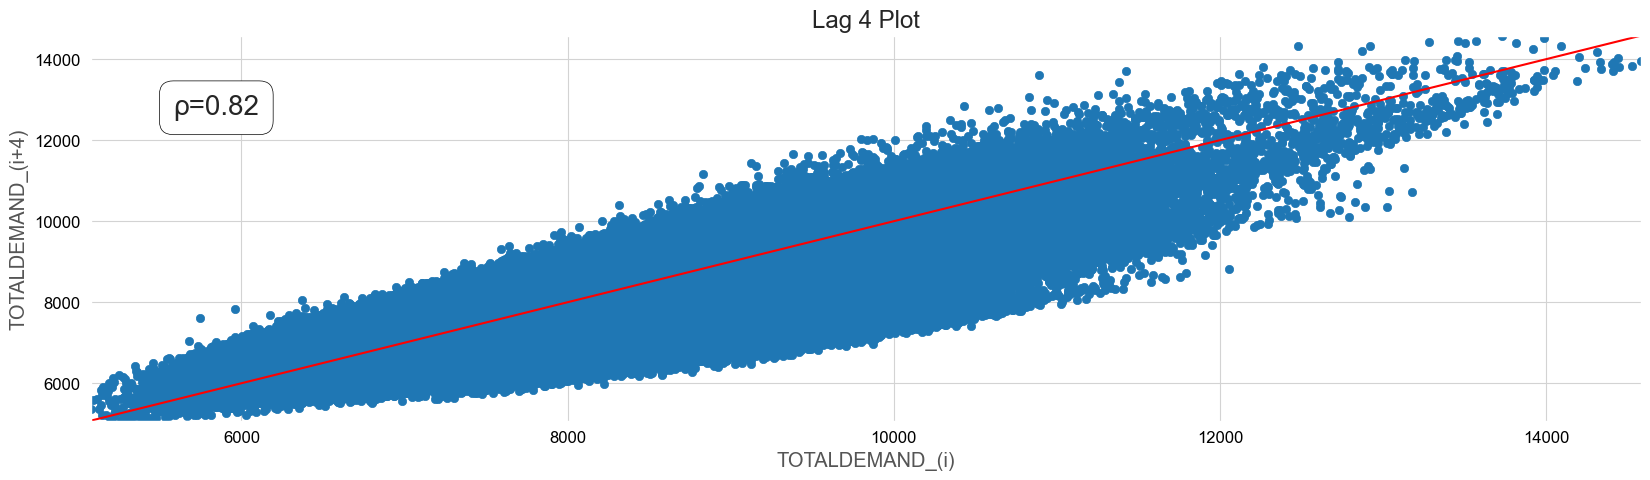

In [73]:
lag_plot(df, 'TOTALDEMAND', 4)

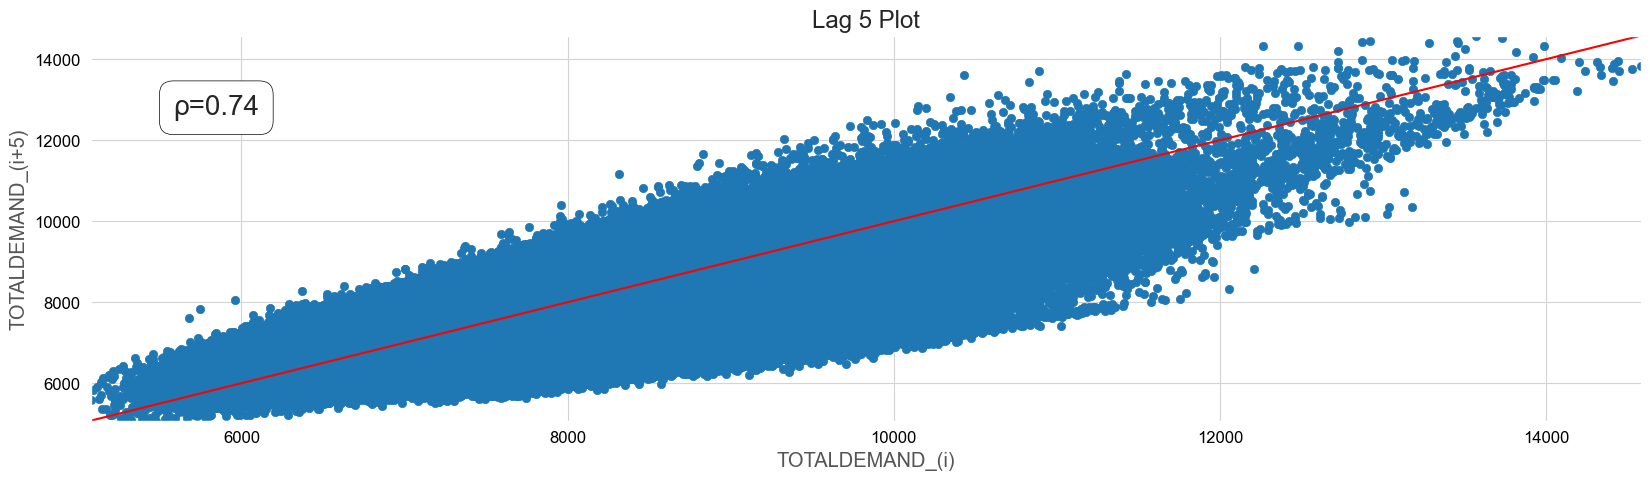

In [74]:
lag_plot(df, 'TOTALDEMAND', 5)